# Предъобработка данных по московским квартирам.

В данном блокноте осуществлена обработка данных московских квартир с целью привести их к корректной форме, чтобы в дальнейшем анализе данных не произошло ошибок или недопустимых значений/результатов.

## Оглавление ноутбука.

* ### [Импорт библиотек](#Импорт-библиотек.)
* ### [Получение данных](#Получение-данных.)
* ### [Первичный осмотр](#Первичный-осмотр.)
    * #### [Резюмирование первичного осмотра](#Резюмирование-первичного-осмотра.)
* ### [Обработка данных по первичному анализу](#Обработка-данных-по-первичному-анализу.)
    * #### [Измненение колонки price](#Измненение-колонки-price.)
    * #### [Изменение типа данных в колонке square](#Изменение-типа-данных-в-колонке-square.)
    * #### [Значения-дубликаты в колонке apartment_type](#Значения-дубликаты-в-колонке-apartment_type.)
    * #### [Удаление записей дубликатов](#Удаление-записей-дубликатов.)
    * #### [Null-значения](#Null-значения.) 
    * #### [Просмотр данных после обработки](#Просмотр-данных-после-обработки.)
    * #### [Аномальные значения price и square](#Аномальные-значения-price-и-square.)
* ### [Добавление новых колонок](#Добавление-новых-колонок.)
    * #### [Добавление колонки, отвечающую за округ](#Добавление-колонки,-отвечающую-за-округ.)
    * #### [Добавление колонки "Цена за квадратный метр"](#Добавление-колонки-Цена-за-квадратный-метр.) 
* ### [Количество квартир по типу жилья](#Количество-квартир-по-типу-жилья.)
* ### [Удаление колонки "adress" и "apartment_floor"](#Удаление-колонки-"adress"-и-"apartment_floor".)
* ### [Порядок столбцов](#Порядок-столбцов.)
* ### [Итог проделанной работы](#Итог-проделанной-работы.)

## Импорт библиотек.

Для обработки данных нам понадобятся следующие библиотеки:
 * **pandas** - непосредственная работа с таблицей данных(dataframe).
 * **numpy** - работа с массивами данных, которые содержатся в датафрейме.

In [1]:
'''
Импорт библиотек.
'''
import pandas as pd
import numpy as np

## Получение данных.

В блокноте **[Скрейпинг данных](http://localhost:8888/notebooks/notebooks/Скрейпинг%20данных.ipynb)** мы получили данные с сайта **Avito** и после оформили эти данные в csv-файл. Получим данные из этого файла.

In [2]:
'''
Получение данных.
'''
apartment_df = pd.read_csv('../data/apartment_data.csv')

## Первичный осмотр.

Данные получены. Теперь можно произвести первичный осмотр данных, чтобы выявить некорректные значения или плохую структуру данных.

In [3]:
# Вид данных.
apartment_df

,price,square,apartment_type,apartment_floor,total_floors,adress,metro_station,distance_to_station
0,10069526,39,2-к. квартира,13,13,"п. Сосенское, дер. Николо-Хованское, кв-л 26, ...",Прокшино,0.8
1,7100000,"18,1",Квартира-студия,3,9,"ул. Маршала Бирюзова, 22к2",Октябрьское поле,0.4
2,16325220,"78,6",3-к. квартира,33,33,"ш. Открытое, вл. 18/1, корп. 1.4",Бульвар Рокоссовского,0.8
3,10397235,"53,1",2-к. квартира,5,21,"пос. Московский, стр. 1",Филатов луг,2.6
4,15361837,"85,3",3-к. квартира,20,21,"пос. Московский, стр. 1",Филатов луг,2.6
...,...,...,...,...,...,...,...,...
3904,11163571,"53,6",2-к. квартира,18,21,"ул. Бартеневская, стр. 1.2",Бунинская аллея,1.0
3905,4990498,"24,9",Квартира-студия,15,15,"6-я Радиальная ул., 3к5",Царицыно,1.7
3906,7003697,"22,3",Квартира-студия,6,15,"п. Сосенское, дер. Николо-Хованское, ул. Никол...",Прокшино,1.3
3907,19246968,"70,1",3-к. квартира,3,13,"2-й Котляковский пер., вл. 1/1",Варшавская,0.9


In [4]:
# Тип данных.
apartment_df.dtypes

price                    int64
square                  object
apartment_type          object
apartment_floor          int64
total_floors             int64
adress                  object
metro_station           object
distance_to_station    float64
dtype: object

In [5]:
# Количество null-значений.
apartment_df.isna().sum()

price                    0
square                   0
apartment_type           0
apartment_floor          0
total_floors             0
adress                  14
metro_station          133
distance_to_station    154
dtype: int64

In [6]:
# Количество записей-дубликатов.
apartment_df.duplicated().sum()

1193

In [7]:
# Количество уникальных значений в колонке станция метро.
apartment_df['metro_station'].unique().size

232

In [8]:
# Количество записей.
apartment_df.shape[0]

3909

In [9]:
# Просмотр уникальных значений в колонке apartment_type.
apartment_df['apartment_type'].unique()

array(['2-к. квартира', 'Квартира-студия', '3-к. квартира',
       '3-к. апартаменты', '1-к. квартира', '4-к. квартира',
       '1-к. апартаменты', '2-к. апартаменты', 'Апартаменты-студия',
       'Своб. планировка', '5-к. квартира', '4-к. апартаменты',
       '7-к. квартира', '6-к. квартира', '8-к. квартира',
       '> 9-к. квартира', '3-к квартира', '9-к. квартира'], dtype=object)

### Резюмирование первичного осмотра.

В ходе первичного осмотра данных, было выявлено следующее:
 * Колонка **price** хранит большие числа, нужно сократить до миллионов.
 * Колонка **square** имеет неправильный тип данных(object вместо float).
 * Одинаковые значения в колонке **apartment_type.**
 * Имеются пропущенные значения в:
    * Колонка **adress** - 14 значений.
    * Колонка **metro_station** - 133 значений.
    * Колонка **distance_to_station** - 154 значений.
    

## Обработка данных по первичному анализу.

Мы выявили ошибки в нашем датасете, теперь исправим их.

### Измненение колонки price.

In [10]:
apartment_df['price'] = apartment_df['price'] / 1000000 # Сократим до миллионов.
apartment_df['price'] = apartment_df.round({'price' : 2})['price'] # Оставим лишь 2 цифры после запятой.
apartment_df.head() # Отобразим первые 5 записей.

,price,square,apartment_type,apartment_floor,total_floors,adress,metro_station,distance_to_station
0,10.07,39,2-к. квартира,13,13,"п. Сосенское, дер. Николо-Хованское, кв-л 26, ...",Прокшино,0.8
1,7.10,"18,1",Квартира-студия,3,9,"ул. Маршала Бирюзова, 22к2",Октябрьское поле,0.4
2,16.33,"78,6",3-к. квартира,33,33,"ш. Открытое, вл. 18/1, корп. 1.4",Бульвар Рокоссовского,0.8
3,10.40,"53,1",2-к. квартира,5,21,"пос. Московский, стр. 1",Филатов луг,2.6
4,15.36,"85,3",3-к. квартира,20,21,"пос. Московский, стр. 1",Филатов луг,2.6


### Изменение типа данных в колонке square.

In [11]:
squares = list(apartment_df['square']) # Вытащим данные из датафрейма.

for i in range(len(squares)):
    squares[i] = squares[i].replace(',', '.') # Для преоразования во float мешает запятая, заменим её на точку.
    
apartment_df['square'] = pd.Series(squares).astype(float) # Меняем данные о площади на новые.

# Посмотрим на типы данных колонок.
apartment_df.dtypes

price                  float64
square                 float64
apartment_type          object
apartment_floor          int64
total_floors             int64
adress                  object
metro_station           object
distance_to_station    float64
dtype: object

### Значения-дубликаты в колонке apartment_type.

В колонке есть неявные значения-дубликаты. Как пример, "2к квартира" и "2к. квартира". С точки зрения человека, эти значения одинаковы, однако компьютер воспринимает их по-разному. Приведём к общему значению.

In [12]:
apartments_type = list(apartment_df['apartment_type'])
for i in range(len(apartments_type)):
    apartments_type[i] = apartments_type[i].replace('. ', ' ')

apartment_df['apartment_type'] = apartments_type

In [13]:
# Снова взглянем на уникальные значения apartment_type.
apartment_df['apartment_type'].unique()

array(['2-к квартира', 'Квартира-студия', '3-к квартира',
       '3-к апартаменты', '1-к квартира', '4-к квартира',
       '1-к апартаменты', '2-к апартаменты', 'Апартаменты-студия',
       'Своб планировка', '5-к квартира', '4-к апартаменты',
       '7-к квартира', '6-к квартира', '8-к квартира', '> 9-к квартира',
       '9-к квартира'], dtype=object)

### Удаление записей дубликатов.

На Авито имеются одинаковые записи. Это не есть хорошо, от дубликатов необходимо избавиться.

In [14]:
'''
Удаление записей-дубликатов.
'''
old_size = apartment_df.shape[0]
apartment_df.drop_duplicates(inplace=True) # Удаляем дубликаты.

# Обновим индексы.
apartment_df.reset_index(inplace=True)

# После обновления появится колонка индекс, удалим её.
apartment_df.drop('index', axis=1, inplace=True)

print(f"Изначальное количество записей: {old_size}")
print(f"Количество записей после удаления дубликатов:{apartment_df.shape[0]}")

Изначальное количество записей: 3909
Количество записей после удаления дубликатов:2716


### Null-значения.

Мы имеем пропуски в следующих столбцах:
 * Адрес
 * Путь до метро
 * Станция метро
Заполнить их исходя из имеющихся данных не кажется мне возможным(есть вероятностей, что мы укажем некорректное присвоение). В худшем случае, мы имеем 154 записи с null-значениями из 2716.


Мною было принято решение удалить записи с null-значениями.

In [15]:
old_size = apartment_df.shape[0]
apartment_df.dropna(inplace=True)
apartment_df.reset_index(inplace=True)
apartment_df.drop('index', axis=1, inplace=True)

print(f'Изначальное количество записей = {old_size}')
print(f'Количество записей без null значений = {apartment_df.shape[0]}\n')
print(f'Было удалено {old_size - apartment_df.shape[0]} записей.')

Изначальное количество записей = 2716
Количество записей без null значений = 2610

Было удалено 106 записей.


### Просмотр данных после обработки.

Задачи по обработке данных, которые были выявлены в первичном осмотре - выполнены. Теперь можно посмотреть на другие параметры данных.

In [16]:
# Снова посмотрим на данные.
apartment_df

,price,square,apartment_type,apartment_floor,total_floors,adress,metro_station,distance_to_station
0,10.07,39.0,2-к квартира,13,13,"п. Сосенское, дер. Николо-Хованское, кв-л 26, ...",Прокшино,0.8
1,7.10,18.1,Квартира-студия,3,9,"ул. Маршала Бирюзова, 22к2",Октябрьское поле,0.4
2,16.33,78.6,3-к квартира,33,33,"ш. Открытое, вл. 18/1, корп. 1.4",Бульвар Рокоссовского,0.8
3,10.40,53.1,2-к квартира,5,21,"пос. Московский, стр. 1",Филатов луг,2.6
4,15.36,85.3,3-к квартира,20,21,"пос. Московский, стр. 1",Филатов луг,2.6
...,...,...,...,...,...,...,...,...
2605,11.16,53.6,2-к квартира,18,21,"ул. Бартеневская, стр. 1.2",Бунинская аллея,1.0
2606,4.99,24.9,Квартира-студия,15,15,"6-я Радиальная ул., 3к5",Царицыно,1.7
2607,7.00,22.3,Квартира-студия,6,15,"п. Сосенское, дер. Николо-Хованское, ул. Никол...",Прокшино,1.3
2608,19.25,70.1,3-к квартира,3,13,"2-й Котляковский пер., вл. 1/1",Варшавская,0.9


In [17]:
# Описательная статистика количественных переменных.
apartment_df.describe()

,price,square,apartment_floor,total_floors,distance_to_station
count,2610.000000,2610.000000,2610.000000,2610.000000,2610.000000
mean,26.536008,61.631954,9.851724,19.105364,0.938161
std,63.808213,47.768657,8.713128,11.544273,0.629314
min,2.050000,10.000000,1.000000,1.000000,0.100000
25%,9.730000,36.600000,3.000000,11.000000,0.500000
50%,13.900000,52.000000,8.000000,17.000000,0.800000
75%,21.270000,74.400000,14.000000,24.000000,1.100000
max,1729.580000,721.000000,66.000000,86.000000,4.600000


### Аномальные значения price и square.

Меня заинтересовало максимальное значение у колонки **price** и **square**, а так же самая дешёвая недвижимость в 2 миллиона, эти данные мне кажутся аномальными. Стоит взглянуть.

In [18]:
# Самые дорогие квартиры.
apartment_df.sort_values('price').tail(10)

,price,square,apartment_type,apartment_floor,total_floors,adress,metro_station,distance_to_station
2150,544.72,199.8,4-к квартира,2,9,"Гранатный пер., 6",Баррикадная,0.7
1329,544.72,242.0,5-к квартира,1,7,"ул. Малая Молчановка, 6",Арбатская,0.7
1035,544.72,194.7,4-к квартира,2,7,"Гранатный пер., 6",Баррикадная,0.7
2286,550.00,379.4,7-к квартира,7,9,"ул. Знаменка, 13с1",Боровицкая,0.2
1059,600.00,721.0,> 9-к квартира,15,17,"Мосфильмовская ул., 70",Ломоносовский проспект,1.1
860,620.00,325.0,8-к квартира,14,14,"Усачёва ул., 11Г",Фрунзенская,0.5
2540,732.84,257.3,5-к квартира,12,14,"пер. Большой Толмачёвский , стр. 1,3,4,4а,1...",Полянка,0.3
1610,770.39,443.8,7-к квартира,7,7,"1-й пер. Тружеников, 17А",Киевская,1.0
2114,823.10,431.0,5-к квартира,5,6,"Бутиковский пер., 5",Парк культуры,0.6
474,1729.58,417.3,4-к квартира,13,14,"пер. Большой Толмачёвский, стр. 1,3,4,4а,12...",Третьяковская,0.3


In [19]:
# Самые дешёвые квартиры.
apartment_df.sort_values('price').head(10)

,price,square,apartment_type,apartment_floor,total_floors,adress,metro_station,distance_to_station
771,2.05,33.7,Квартира-студия,1,3,"Молдавская ул., 2к1",Кунцевская,0.3
107,2.60,35.0,Своб планировка,1,3,"д. Дудкино, садоводческое некоммерческое товар...",Румянцево,1.7
1631,2.65,16.6,Квартира-студия,2,23,"ул. Анны Ахматовой, 11к1",Рассказовка,0.2
1042,2.65,10.0,Квартира-студия,1,12,"ул. Корнейчука, 16",Алтуфьево,1.5
1162,2.80,10.0,Квартира-студия,2,12,"ул. Авиаконструктора Миля, 14",Жулебино,0.2
138,2.90,10.5,Квартира-студия,2,16,"Москва, проезд Одоевского, 2А",Тёплый стан,1.6
1773,2.90,10.0,Квартира-студия,1,12,"ул. Тёплый Стан, 15к5",Тёплый стан,1.1
1203,2.90,12.0,Апартаменты-студия,2,2,"Волжский б-р, 8к3",Текстильщики,1.0
1583,2.90,10.0,Квартира-студия,1,9,"Ферганская ул., 30",Юго-Восточная,0.8
838,2.99,16.1,Апартаменты-студия,1,5,"ул. Ремизова, 3к1",Нагорная,1.0


Количество записей уменьшилось, однако всё так же присутствуют аномальные значения в цене, а именно:

 * Максимальное значение равно почти 1.7 миллиардам рублей, учитывая тот факт, что 75% квартир стоят меньше 21.3 миллионов.
 * Весьма подозрительная минимальная цена квартиры в 2.05 миллионов рублей. Для Москвы такой ценник в **2022 году** действительно странный, учитывая, что даже на краю города минимальная цена квартиры/студии не меньше 5 миллионов. А учитывая площадь 33 квадратных метра, то тем более 
 
Посмотрим на гистограмму цен.

<AxesSubplot:>

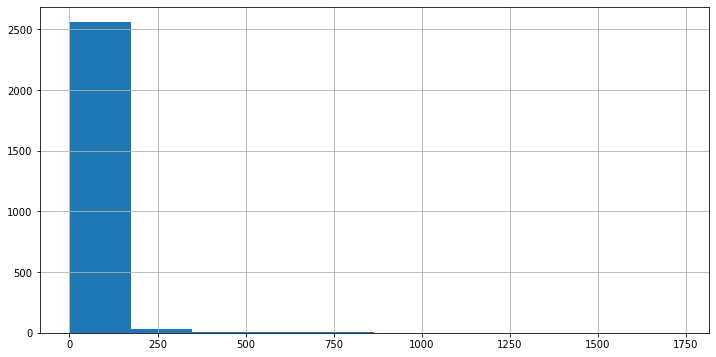

In [20]:
apartment_df['price'].hist(figsize=(12,6))

<div class="alert alert-info" role="alert">
  Мы видим, что почти все наблюдения находятся в диапозоне от 0 до 250 миллионов рублей. Остальное же является выбросом, которое мешает нам сделает корректный анализ. От них нужно избавиться.
</div>


Исходя из правила о **трёх сигмах** мы имеет следующее:

$$
M \pm 3\sigma \approx A
$$ 

$M$ - Среднее значение.

$\sigma$ - Стандартное отклонение.

$A$ - 100% наблюдений из нашей таблицы.

По данным анализа с сайта **РБК** минимальная стоимость квартиры на 2021-ый год - 5.3 млн рублей, а вот конечный **необходимо рассчитать исходя из вышеупомянутой формулы.**

**Примечание:** В качестве минимальной цены, я возьму округлённое значение, а именно 5 млн рублей.

In [21]:
'''
Считаем конечный диапозон.
'''
result = round((apartment_df['price'].mean() + (3 * apartment_df['price'].std())), 0)
print(f"Конечный диапозон = {result}")

Конечный диапозон = 218.0


**Необходимо сделать следующее:**  оставить записи, где цена находится в диапозоне от 5 до 218 миллионов рублей включительно.

In [22]:
# Производим фильтрацию по запросу.
apartment_df = apartment_df.query("price >= 5.0 & price <= 218.0")

# Обновление индексов.
apartment_df.reset_index(inplace=True)
apartment_df.drop('index', axis=1, inplace=True)

# Вновь посмотрим на описательную статистику данных.
apartment_df.describe()

C:\Users\ZharovEM\Anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,price,square,apartment_floor,total_floors,distance_to_station
count,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000
mean,21.817784,61.581924,10.418992,19.763015,0.954186
std,25.230158,37.209489,8.709011,11.628345,0.636697
min,5.000000,10.100000,1.000000,1.000000,0.100000
25%,10.410000,38.500000,4.000000,12.000000,0.500000
50%,14.300000,53.800000,8.000000,17.000000,0.800000
75%,21.500000,74.800000,14.000000,25.000000,1.100000
max,215.550000,456.100000,66.000000,86.000000,4.600000


<AxesSubplot:>

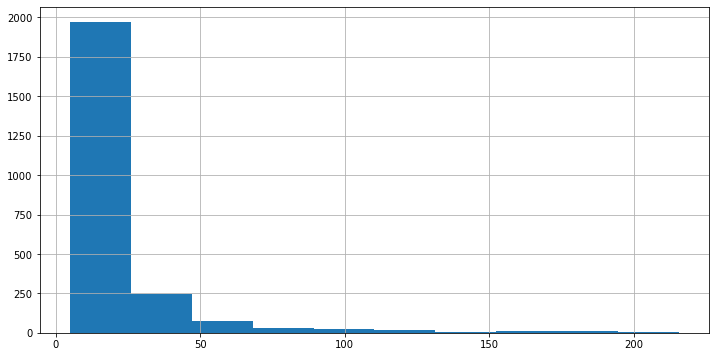

In [23]:
# Вновь посмотрим на гистограмму.
apartment_df['price'].hist(figsize=(12,6))

Теперь описательная статистика выглядит более коректно. Стандартное отклонение сильно уменьшилось, а ценовая политика вмещает в себя как очень дешёвые квартиры, так и достаточно дорогие, учитывая реальные цены. Т.е вполне вероятно найти квартиру в Москве за 5-6 миллионов(как пример небольшая новостройка на краю города) и вполне реально увидеть дорогие квартиры за 200 миллионов(как пример, аппартаменты в Москва-Сити).

## Добавление новых колонок.

В нашем датасете хватает полезной информации, однако не хватает парочки важных колонок, которые понадобатся в анализе данных, а именно:
 * Колонка округа, в котором находится квартира.
 * Колонка цены за квадратный метр.
 
Давайте добавим их.

### Добавление колонки, отвечающую за округ.

Я посчитал, что информация о том, в каком округе находится квартира будет полезной для анализа. Изначальной информации об этом нет, однако мы можем найти округ в котором находится квартира исходя из ближайшей станции метро.

**Информацию по округам и станциям метро можно взять [отсюда](https://metro.mwmoskva.ru/stancii-spisok/po-okrugam/)**

<div class="alert alert-info" role="alert">
    Мы имеем следующий <b>список округов:</b>
</div>


 * *Восточный*
 * *Западный*
 * *Новомосковский*
 * *Северный*
 * *Северо-восточный*
 * *Северо-западный*
 * *Центральный*
 * *Юго-восточный*
 * *Юго-западный*
 * *Южный* 
 
 
Для достоверности сверимся с картой без Новомосковского округа.
![Image of Yaktocat](../docs/districts.png)

В первую очередь, создадим кортежи, в которых будут храниться:
 * Название округов
 * Станции метро для каждого округа.
 
**Примечание:** Список округов можно было получить сделав парсинг сайта. Однако я решил создать списки вручную, в силу того, что по времени это занимает одинаковое количество.

In [24]:
# Список округов.
districts_names = ('Восточный', 'Западный',
             'Новомосковский', 'Северный',
             'Северо-восточный', 'Северо-западный',
             'Центральный', 'Юго-восточный',
             'Юго-западный', 'Южный')

# Станции Восточного округа.
east_district = ( 'Авиамоторная', 'Андроновка', 'Белокаменная',
                 'Бульвар Рокоссовского', 'Измайлово', 'Измайловская',
                 'Локомотив', 'Лухмановская', 'Новогиреево',
                 'Новокосино', 'Партизанская', 'Первомайская',
                 'Перово', 'Преображенская площадь', 'Семёновская',
                 'Соколиная гора', 'Сокольники', 'Улица Дмитриевского',
                 'Черкизовская', 'Шоссе Энтузиастов', 'Щёлковская',
                 'Электрозаводская')

# Станции Западного округа.
west_district = ( 'Багратионовская', 'Боровское шоссе', 'Киевская',
                 'Кропоткинская', 'Крылатское', 'Кунцевская',
                 'Кутузовская', 'Ломоносовский проспект', 'Минская',
                 'Мичуринский проспект', 'Молодежная', 'Новопеределкино',
                 'Озёрная', 'Парк Победы', 'Пионерская',
                 'Проспект Вернадского', 'Рабочий Посёлок', 'Раменки',
                 'Сетунь', 'Славянский бульвар', 'Солнцево',
                 'Студенческая', 'Тропарёво', 'Филёвский парк',
                 'Фили', 'Юго-Западная', 'Мякинино', 'Аминьевская', 'Давыдково', 'Молодёжная')

# Станции Новомосковского округа.
new_moscow_district = ( 'Говорово', 'Коммунарка', 'Ольховая',
                       'Остафьево', 'Прокшино', 'Рассказовка',
                       'Румянцево', 'Саларьево', 'Филатов луг', 'Щербинка')

# Станции Северного округа.
north_district = ( 'Аэропорт', 'Балтийская', 'Беговая',
                  'Беломорская', 'Бескудниково', 'Верхние Лихоборы',
                  'Водный стадион', 'Войковская', 'Гражданская',
                  'Дегунино', 'Динамо', 'Дмитровская',
                  'Зорге', 'Коптево', 'Красный Балтиец',
                  'Лихоборы', 'Марк', 'Окружная',
                  'Панфиловская', 'Петровский парк', 'Петровско-Разумовская',
                  'Полежаевская', 'Речной вокзал', 'Савёловская',
                  'Селигерская', 'Сокол', 'Стрешнево',
                  'Тимирязевская', 'Ховрино', 'Хорошёво',
                  'Хорошёвская', 'ЦСКА')

# Станции Северо-восточного округа.
nort_east_district = ( 'Алексеевская', 'Алтуфьево', 'Бабушкинская',
                      'Бибирево', 'Ботанический сад', 'Бутырская',
                      'ВДНХ', 'Владыкино', 'Выставочный центр',
                      'Лианозово', 'Марьина Роща', 'Медведково',
                      'Окружная', 'Отрадное', 'Ростокино',
                      'Савёловская', 'Свиблово', 'Телецентр',
                      'Улица Академика Королёва', 'Улица Милашенкова', 'Улица Сергея Эйзенштейна', 'Фонвизинская')

# Станции Северо-западного округа.
nort_west_district = ( 'Волоколамская', 'Митино', 'Мнёвники',
                      'Народное Ополчение', 'Октябрьское поле', 'Пенягино',
                      'Планерная', 'Пятницкое шоссе', 'Спартак',
                      'Строгино', 'Сходненская', 'Трикотажная',
                      'Тушинская', 'Щукинская', 'Терехово')

# Станции Центрального округа.
center_district = ( 'Александровский сад', 'Арбатская', 'Баррикадная',
                   'Бауманская', 'Беговая', 'Белорусская',
                   'Библиотека имени Ленина', 'Боровицкая', 
                   'Выставочная', 'Деловой центр', 'Деловой центр (МЦК)', 'Добрынинская',
                   'Достоевская', 'Каланчёвская', 'Китай-город',
                   'Комсомольская', 'Краснопресненская', 'Красные ворота',
                   'Крестьянская застава', 'Кузнецкий мост', 'Курская',
                   'Лубянка', 'Лужники', 'Марксистская',
                   'Маяковская', 'Международная', 'Менделеевская',
                   'Новокузнецкая', 'Новослободская', 'Октябрьская',
                   'Охотный ряд', 'Павелецкая', 'Парк культуры',
                   'Площадь Ильича', 'Площадь революции', 'Полянка',
                   'Пролетарская', 'Проспект Мира', 'Пушкинская',
                   'Рижская', 'Серпуховская', 'Смоленская',
                   'Спортивная', 'Сретенский бульвар', 'Сухаревская',
                   'Таганская', 'Тверская', 'Театральная',
                   'Тестовская', 'Третьяковская', 'Трубная',
                   'Тургеневская', 'Улица 1905 года', 'Фрунзенская',
                   'Цветной бульвар', 'Чеховская', 'Чистые пруды',
                   'Чкаловская', 'Шелепиха', 'Электрозаводская', 'Римская', 'Красносельская',
                  'Воробьёвы горы')

# Станции Юго-восточного округа.
south_east_district = ( 'Авиамоторная', 'Братиславская', 'Волгоградский проспект',
                       'Волжская', 'Выхино', 'Депо',
                       'Дубровка', 'Жулебино', 'Калитники',
                       'Кожуховская', 'Косино', 'Котельники',
                       'Кубанская', 'Кузьминки', 'Курьяново',
                       'Лермонтовский проспект', 'Лефортово', 'Люблино',
                       'Марьино', 'Москва-Товарная', 'Некрасовка',
                       'Нижегородская', 'Новохохловская', 'Окская',
                       'Перерва', 'Печатники', 'Рязанский проспект',
                       'Стахановская', 'Текстильщики', 'Угрешская', 'Юго-Восточная')

# Станции Юго-западного округа.
south_west_district = ('Академическая', 'Беляево', 'Битцевский парк',
                       'Бульвар адмирала Ушакова', 'Бульвар Дмитрия Донского', 'Бунинская аллея',
                       'Бутово', 'Калужская', 'Каховская',
                       'Коньково', 'Нахимовский проспект', 'Новоясеневская',
                       'Новые Черёмушки', 'Площадь Гагарина', 'Профсоюзная',
                       'Севастопольская', 'Тёплый стан', 'Улица Горчакова',
                       'Улица Скобелевская', 'Улица Старокачаловская', 'Университет', 'Ясенево', 
                       'Воронцовская', 'Новаторская', 'Зюзино')

# Станции Южного округа.
south_distirct = ('Автозаводская', 'Алма-Атинская', 'Аннино',
                  'Борисово', 'Варшавская', 'Верхние котлы',
                  'Домодедовская', 'ЗИЛ', 'Зябликово',
                  'Кантемировская', 'Каширская', 'Коломенская',
                  'Красногвардейская', 'Красный Строитель', 'Крымская',
                  'Ленинский проспект', 'Лесопарковая', 'Москворечье',
                  'Нагатинская', 'Нагорная', 'Орехово',
                  'Покровское', 'Пражская', 'Технопарк',
                  'Тульская', 'Улица академика Янгеля', 'Царицыно',
                  'Чертановская', 'Шаболовская', 'Шипиловская', 'Южная')

Можно увидеть, что некоторые станции метро повторяются в разных округах. Возможно, это связано с тем, что территориально, метро находится между двумя округами. Как бы то не было, я буду добавлять станцию в первый подходящий список.

<div class="alert alert-info" role="alert">
  Теперь, исходя из имеющихся данных о станциях и округах, получим округ для каждой записи в нашем датасете.
</div>

In [25]:
# Получаем список станций для каждой квартиры.
stations = list(apartment_df['metro_station'])

# Создадим пустой список округов.
districts = []


# С помощью цикла пройдёмся по каждой и определим в каком округе находится данное метро.
for station in stations:
    if station in east_district:
        districts.append(districts_names[0])
        continue
        
    elif station in west_district:
        districts.append(districts_names[1])
        continue
        
    elif station in new_moscow_district:
        districts.append(districts_names[2])
        continue
        
    elif station in north_district:
        districts.append(districts_names[3])
        continue
        
    elif station in nort_east_district:
        districts.append(districts_names[4])
        continue
        
    elif station in nort_west_district:
        districts.append(districts_names[5])
        continue
        
    elif station in center_district:
        districts.append(districts_names[6])
        continue

    elif station in south_east_district:
        districts.append(districts_names[7])
        continue
        
    elif station in south_west_district:
        districts.append(districts_names[8])
        continue
        
    elif station in south_distirct:
        districts.append(districts_names[9])
        continue

In [26]:
# Создание колонки "округ".
apartment_df['district'] = pd.Series(districts)

C:\Users\ZharovEM\AppData\Local\Temp/ipykernel_15848/1780019029.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apartment_df['district'] = pd.Series(districts)


In [27]:
# Взглянем на наш датасет.
apartment_df

,price,square,apartment_type,apartment_floor,total_floors,adress,metro_station,distance_to_station,district
0,10.07,39.0,2-к квартира,13,13,"п. Сосенское, дер. Николо-Хованское, кв-л 26, ...",Прокшино,0.8,Новомосковский
1,7.10,18.1,Квартира-студия,3,9,"ул. Маршала Бирюзова, 22к2",Октябрьское поле,0.4,Северо-западный
2,16.33,78.6,3-к квартира,33,33,"ш. Открытое, вл. 18/1, корп. 1.4",Бульвар Рокоссовского,0.8,Восточный
3,10.40,53.1,2-к квартира,5,21,"пос. Московский, стр. 1",Филатов луг,2.6,Новомосковский
4,15.36,85.3,3-к квартира,20,21,"пос. Московский, стр. 1",Филатов луг,2.6,Новомосковский
...,...,...,...,...,...,...,...,...,...
2396,42.66,97.9,3-к квартира,16,18,"пр-т Андропова, стр. А1",Технопарк,0.9,Южный
2397,11.16,53.6,2-к квартира,18,21,"ул. Бартеневская, стр. 1.2",Бунинская аллея,1.0,Юго-западный
2398,7.00,22.3,Квартира-студия,6,15,"п. Сосенское, дер. Николо-Хованское, ул. Никол...",Прокшино,1.3,Новомосковский
2399,19.25,70.1,3-к квартира,3,13,"2-й Котляковский пер., вл. 1/1",Варшавская,0.9,Южный


Убедимся, что нет null-значений.

In [28]:
apartment_df.isna().sum()

price                  0
square                 0
apartment_type         0
apartment_floor        0
total_floors           0
adress                 0
metro_station          0
distance_to_station    0
district               0
dtype: int64

<div class="alert alert-success" role="alert">
  Округи успешно добавлены в наш датасет!
</div>

### Добавление колонки Цена за квадратный метр.

В нашем датасете также не хватает колонки, которая показывает цену за один квадратный метр. При анализе рынка недвижимости это будет полезной информацией. Колонка будет называться **price_per_square_metr.**

Высчитывается она по следующей формуле:

$$ p= P \div S, $$ 
\\( P \\) - цена квартиры.

\\( S \\) - площадь квартиры в квадратных метрах.

Для удобства, мы будем измерять это значение в **тысячах.** 
Так как цена за квартиру сейчас представлена в миллионах, то сначала умножим это значение на миллион

In [29]:
'''
Вычисление цены за квадратный метр.
'''
# Находим полную цену в миллионах.
full_price = apartment_df['price'] * 1000000
apartment_df['price_per_square_metr'] = full_price / apartment_df['square'] / 1000

# Округлим до 2 цифр после запятой.
apartment_df['price_per_square_metr'] = np.round(apartment_df['price_per_square_metr'], 2)

C:\Users\ZharovEM\AppData\Local\Temp/ipykernel_15848/1077779684.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apartment_df['price_per_square_metr'] = full_price / apartment_df['square'] / 1000
C:\Users\ZharovEM\AppData\Local\Temp/ipykernel_15848/1077779684.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apartment_df['price_per_square_metr'] = np.round(apartment_df['price_per_square_metr'], 2)


In [30]:
apartment_df.head(3)

,price,square,apartment_type,apartment_floor,total_floors,adress,metro_station,distance_to_station,district,price_per_square_metr
0,10.07,39.0,2-к квартира,13,13,"п. Сосенское, дер. Николо-Хованское, кв-л 26, ...",Прокшино,0.8,Новомосковский,258.21
1,7.10,18.1,Квартира-студия,3,9,"ул. Маршала Бирюзова, 22к2",Октябрьское поле,0.4,Северо-западный,392.27
2,16.33,78.6,3-к квартира,33,33,"ш. Открытое, вл. 18/1, корп. 1.4",Бульвар Рокоссовского,0.8,Восточный,207.76


## Количество квартир по типу жилья.

Меня беспокоит, что в наших данных могут оказаться квартиры в небольшом экземпляре в разрезе типа жилья. Не хотелось бы анализировать пятикомнатные квартиры в количестве 4 штук. Давайте посмотрим, что мы имеем.

In [31]:
apartment_df.groupby('apartment_type').agg('count').reset_index().sort_values('price')

,apartment_type,price,square,apartment_floor,total_floors,adress,metro_station,distance_to_station,district,price_per_square_metr
13,> 9-к квартира,1,1,1,1,1,1,1,1,1
12,9-к квартира,1,1,1,1,1,1,1,1,1
11,8-к квартира,1,1,1,1,1,1,1,1,1
10,7-к квартира,3,3,3,3,3,3,3,3,3
9,6-к квартира,5,5,5,5,5,5,5,5,5
6,4-к апартаменты,7,7,7,7,7,7,7,7,7
16,Своб планировка,18,18,18,18,18,18,18,18,18
8,5-к квартира,22,22,22,22,22,22,22,22,22
4,3-к апартаменты,39,39,39,39,39,39,39,39,39
0,1-к апартаменты,61,61,61,61,61,61,61,61,61


Как и ожидалось, у нас есть квартиры, которые имеются в малом экземпляре. Я бы предпочёл убрать квартиры, где количество записей ниже 30, что собственно и сделаю.

In [32]:
'''
Удаление лишних записей по типу кваритры.
'''

# Создадим кортеж с ненужными типами квартир.
usless_apartment_type_tuple = (
    '> 9-к квартира', '9-к квартира', '8-к квартира',
    '7-к квартира', '6-к квартира', '4-к апартаменты',
    'Своб планировка', '5-к квартира'
)

# Убираем их из датасета.
apartment_df = apartment_df[~apartment_df['apartment_type'].isin(usless_apartment_type_tuple)]

In [33]:
apartment_df.groupby('apartment_type').agg('count').reset_index().sort_values('price')

,apartment_type,price,square,apartment_floor,total_floors,adress,metro_station,distance_to_station,district,price_per_square_metr
4,3-к апартаменты,39,39,39,39,39,39,39,39,39
0,1-к апартаменты,61,61,61,61,61,61,61,61,61
2,2-к апартаменты,79,79,79,79,79,79,79,79,79
7,Апартаменты-студия,80,80,80,80,80,80,80,80,80
6,4-к квартира,119,119,119,119,119,119,119,119,119
8,Квартира-студия,206,206,206,206,206,206,206,206,206
1,1-к квартира,433,433,433,433,433,433,433,433,433
5,3-к квартира,563,563,563,563,563,563,563,563,563
3,2-к квартира,763,763,763,763,763,763,763,763,763


Отлично, мы избавились от квартир, представленных в малом количестве.

## Удаление колонки "adress" и "apartment_floor". 

Я не вижу смысла хранить данные колонки, т.к мне важна картина в целом, нахожу её избыточной.

In [34]:
apartment_df.drop(['adress', 'apartment_floor'], axis=1, inplace=True)
apartment_df

C:\Users\ZharovEM\Anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,price,square,apartment_type,total_floors,metro_station,distance_to_station,district,price_per_square_metr
0,10.07,39.0,2-к квартира,13,Прокшино,0.8,Новомосковский,258.21
1,7.10,18.1,Квартира-студия,9,Октябрьское поле,0.4,Северо-западный,392.27
2,16.33,78.6,3-к квартира,33,Бульвар Рокоссовского,0.8,Восточный,207.76
3,10.40,53.1,2-к квартира,21,Филатов луг,2.6,Новомосковский,195.86
4,15.36,85.3,3-к квартира,21,Филатов луг,2.6,Новомосковский,180.07
...,...,...,...,...,...,...,...,...
2396,42.66,97.9,3-к квартира,18,Технопарк,0.9,Южный,435.75
2397,11.16,53.6,2-к квартира,21,Бунинская аллея,1.0,Юго-западный,208.21
2398,7.00,22.3,Квартира-студия,15,Прокшино,1.3,Новомосковский,313.90
2399,19.25,70.1,3-к квартира,13,Варшавская,0.9,Южный,274.61


## Порядок столбцов.

Датасет практически обработан. Финальным штрихом послужит перераспределение порядка столбцов, т.к как, например, информация о цене представлена в разных концах датасета, это немного портит впечатление, упорядочим их.

In [35]:
# Создадим порядок.
correct_columns_order = [
    'price_per_square_metr', 'price', 'square',
    'distance_to_station', 'total_floors', 'district', 'metro_station', 'apartment_type'
]

apartment_df = apartment_df[correct_columns_order]
apartment_df.reset_index(inplace=True)
apartment_df.drop(['index'], axis=1, inplace=True)
apartment_df

,price_per_square_metr,price,square,distance_to_station,total_floors,district,metro_station,apartment_type
0,258.21,10.07,39.0,0.8,13,Новомосковский,Прокшино,2-к квартира
1,392.27,7.10,18.1,0.4,9,Северо-западный,Октябрьское поле,Квартира-студия
2,207.76,16.33,78.6,0.8,33,Восточный,Бульвар Рокоссовского,3-к квартира
3,195.86,10.40,53.1,2.6,21,Новомосковский,Филатов луг,2-к квартира
4,180.07,15.36,85.3,2.6,21,Новомосковский,Филатов луг,3-к квартира
...,...,...,...,...,...,...,...,...
2338,435.75,42.66,97.9,0.9,18,Южный,Технопарк,3-к квартира
2339,208.21,11.16,53.6,1.0,21,Юго-западный,Бунинская аллея,2-к квартира
2340,313.90,7.00,22.3,1.3,15,Новомосковский,Прокшино,Квартира-студия
2341,274.61,19.25,70.1,0.9,13,Южный,Варшавская,3-к квартира


Теперь **красиво :)**


<div class="alert alert-info" role="alert">
  Вновь посмотрим на кол-во пропущенных значений и описательную статистику.
</div>

In [36]:
# Количество null-значений.
apartment_df.isna().sum()

price_per_square_metr    0
price                    0
square                   0
distance_to_station      0
total_floors             0
district                 0
metro_station            0
apartment_type           0
dtype: int64

In [37]:
# Описательная статистика.
apartment_df.describe()

,price_per_square_metr,price,square,distance_to_station,total_floors
count,2343.000000,2343.000000,2343.000000,2343.000000,2343.000000
mean,320.008685,20.366675,59.037900,0.959411,19.856167
std,143.430121,21.875663,30.441451,0.638145,11.637870
min,100.000000,5.000000,10.100000,0.100000,1.000000
25%,237.615000,10.300000,38.300000,0.500000,12.000000
50%,288.000000,14.150000,53.000000,0.800000,17.000000
75%,352.385000,20.745000,73.550000,1.100000,25.000000
max,1824.070000,215.550000,278.500000,4.600000,86.000000


## Итог проделанной работы.

Предъобработка данных была успешна завершена. Из проделанной работы можно выделить следующее:
 * Избавились от **null-значений.**
 * Избавились от **записей-дубликатов.**
 * Убраны **наблюдения-выбросы**, имеющие аномально высокие и низкие значения.
 * Добавлена колонка **"округ"** и **"цена за квадратный метр".**
 * Кол-во записей до обработки данных = **3909.**
 * Кол-во записей после обработки данных = **2343.**
 
Данные **готовы** для анализа, сохраним их.

In [38]:
# Сохраниение данных.
apartment_df.to_csv('../data/clean_apartment_data.csv', index=False)